<a href="https://colab.research.google.com/github/MIcoder003/Undewater_Pothole_detection/blob/main/YoloModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os

from google.colab.patches import cv2_imshow

IMAGES = "/content/drive/MyDrive/Potholes/IMG/"
# re_image = cv2.resize(cv2.imread(os.path.join(IMAGES,filename)), (225, 225), fx = 0.1, fy = 0.1)

# Read image paths
images = []
for filename in os.listdir(IMAGES):
  print(os.path.join(IMAGES,filename))
  img =  cv2.imread(os.path.join(IMAGES,filename))
  # print(img)
  img = cv2.resize(cv2.imread(os.path.join(IMAGES,filename)), (225, 225), fx = 0.1, fy = 0.1)
  # print("done")
  if img is not None:
    images.append(img)



/content/drive/MyDrive/Potholes/IMG/Pothole-006.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-011.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-002.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-351.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-015.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-001.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-020.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-007.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-003.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-022.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-029.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-026.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-053.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-037.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-038.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-049.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-040.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-042.jpg
/content/drive/MyDrive/Potholes/IMG/Pothole-025.jpg
/content/dri

error: ignored

In [ ]:
print(len(images))

713


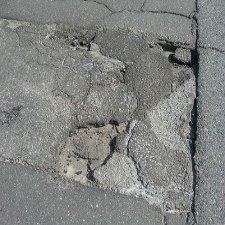

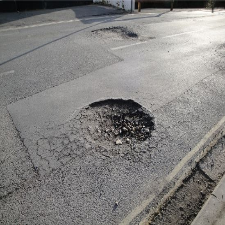

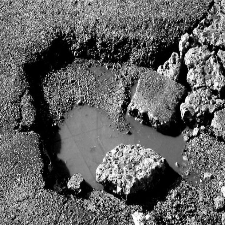

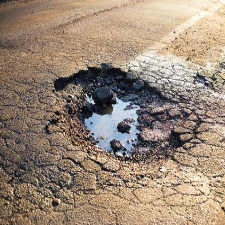

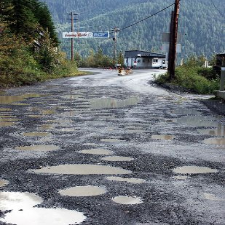

In [ ]:
#display 3 random images

import random

rand = random.sample(range(0, 712), 5)

for i in rand:
  cv2_imshow(images[i])

**Data prep**

In [ ]:
!pip install split-folders

In [ ]:
import numpy as np
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Potholes',output = 'data_1',seed = 1337,ratio=(.7,.3))

Copying files: 3565 files [00:56, 62.63 files/s] 


In [ ]:
!cp -r data_1 data

In [ ]:
import shutil
import os

# Set the paths to your folders
labels_folder = '/content/data/train/TXT'
train_folder = '/content/data/train/IMG'

# Get a list of files in the labels folder
files_to_move = os.listdir(labels_folder)

# Iterate through the files and move them to the train folder
for file_name in files_to_move:
    source_path = os.path.join(labels_folder, file_name)
    destination_path = os.path.join(train_folder, file_name)

    # Use shutil.move to move the file
    shutil.move(source_path, destination_path)

In [ ]:
# Set the paths to your folders
labels_folder = '/content/data/val/TXT'
test_folder = '/content/data/val/IMG'

# Get a list of files in the labels folder
files_to_move = os.listdir(labels_folder)

# Iterate through the files and move them to the train folder
for file_name in files_to_move:
    source_path = os.path.join(labels_folder, file_name)
    destination_path = os.path.join(test_folder, file_name)

    # Use shutil.move to move the file
    shutil.move(source_path, destination_path)

In [ ]:
# Set the paths to your folders
labels_folder = '/content/data_1/train/TXT'
test_folder = '/content/data/train/gen_imgs'

# Get a list of files in the labels folder
files_to_move = os.listdir(labels_folder)

# Iterate through the files and move them to the train folder
for file_name in files_to_move:
    source_path = os.path.join(labels_folder, file_name)
    destination_path = os.path.join(test_folder, file_name)

    # Use shutil.move to move the file
    shutil.copyfile(source_path, destination_path)

In [ ]:
# Set the paths to your folders
labels_folder = '/content/data_1/val/TXT'
test_folder = '/content/data/val/gen_imgs'

# Get a list of files in the labels folder
files_to_move = os.listdir(labels_folder)

# Iterate through the files and move them to the train folder
for file_name in files_to_move:
    source_path = os.path.join(labels_folder, file_name)
    destination_path = os.path.join(test_folder, file_name)

    # Use shutil.move to move the file
    shutil.copyfile(source_path, destination_path)

In [ ]:
!rm -r '/content/data/train/IMG/TXT'


**YOLOv8 MODEL**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 7.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 344MB/s]


In [ ]:
results = model.train(
      data='/content/data.yaml',
      imgsz=640,
      epochs=50,
      batch=8,
      name='yolov8n_custom'
    )

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torch

train: Scanning /content/data/train/gen_imgs... 499 images, 0 backgrounds, 4 corrupt: 100%|██████████| 499/499 [00:00<00:00, 1502.12it/s]

train: WARNING ⚠️ /content/data/train/gen_imgs/Pothole-261.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     5.5255      1.4888      2.2653      1.1414]
train: WARNING ⚠️ /content/data/train/gen_imgs/Pothole-262.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     6.3316      1.1216      3.1224      1.7171]
train: WARNING ⚠️ /content/data/train/gen_imgs/Pothole-268.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     5.2959      1.4144      1.1939]
train: WARNING ⚠️ /content/data/train/gen_imgs/Pothole-271.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     5.1327      1.5112       2.602]
train: New cache created: /content/data/train/gen_imgs.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/val/gen_imgs... 214 images, 0 backgrounds, 0 corrupt: 100%|██████████| 214/214 [00:00<00:00, 839.03it/s] 

val: New cache created: /content/data/val/gen_imgs.cache


Plotting labels to runs/detect/yolov8n_custom3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_custom3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.85G      1.836      2.522      1.901         37        640: 100%|██████████| 62/62 [00:21<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        214        343      0.174      0.296      0.115     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.88G      2.044      2.267      2.032         22        640: 100%|██████████| 62/62 [00:17<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.04it/s]

                   all        214        343     0.0546        0.3     0.0332     0.0104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.89G      2.052      2.454      2.136         26        640: 100%|██████████| 62/62 [00:17<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.28it/s]

                   all        214        343      0.113      0.134     0.0543     0.0196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.88G      2.098      2.492      2.108         21        640: 100%|██████████| 62/62 [00:18<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]

                   all        214        343     0.0371     0.0962      0.011    0.00383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.88G      2.115      2.425      2.165         18        640: 100%|██████████| 62/62 [00:17<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.76it/s]

                   all        214        343      0.031      0.125     0.0143    0.00359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.89G      2.031      2.352      2.069         30        640: 100%|██████████| 62/62 [00:17<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.09it/s]

                   all        214        343      0.294      0.324       0.21     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.89G       2.03      2.319      2.084         20        640: 100%|██████████| 62/62 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.32it/s]

                   all        214        343      0.279      0.233      0.176     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.89G      1.911      2.214      2.014         15        640: 100%|██████████| 62/62 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.14it/s]


                   all        214        343      0.266      0.268      0.194     0.0744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.88G       1.89      2.139      1.945         20        640: 100%|██████████| 62/62 [00:18<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.82it/s]

                   all        214        343       0.31      0.324      0.246      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.88G      1.914       2.16      1.961         21        640: 100%|██████████| 62/62 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.23it/s]

                   all        214        343      0.228      0.125      0.103      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.88G      1.887      2.101      1.945         28        640: 100%|██████████| 62/62 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.14it/s]


                   all        214        343      0.347      0.299      0.276      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.89G      1.796       2.01      1.877         24        640: 100%|██████████| 62/62 [00:18<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.63it/s]

                   all        214        343      0.374      0.306      0.258       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       3.9G      1.791      2.027      1.882         15        640: 100%|██████████| 62/62 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.27it/s]

                   all        214        343      0.434      0.399      0.344      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.92G      1.821      2.032      1.911         19        640: 100%|██████████| 62/62 [00:18<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.42it/s]

                   all        214        343      0.428      0.428      0.357      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.89G      1.768      2.026      1.844         58        640: 100%|██████████| 62/62 [00:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.31it/s]

                   all        214        343      0.458      0.384      0.369      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.88G      1.767      1.972      1.872         29        640: 100%|██████████| 62/62 [00:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.16it/s]

                   all        214        343      0.485      0.429      0.388      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.89G      1.703      1.854      1.808         26        640: 100%|██████████| 62/62 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.26it/s]

                   all        214        343      0.402      0.475      0.377      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.89G       1.73      1.872      1.849         25        640: 100%|██████████| 62/62 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]

                   all        214        343      0.531      0.443      0.417      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       3.9G      1.708      1.888      1.833         17        640: 100%|██████████| 62/62 [00:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.26it/s]

                   all        214        343      0.446      0.387      0.342      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       3.9G      1.656      1.767      1.761         19        640: 100%|██████████| 62/62 [00:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]

                   all        214        343      0.508      0.443      0.388      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.89G       1.66      1.749      1.783         22        640: 100%|██████████| 62/62 [00:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.90it/s]

                   all        214        343      0.494       0.49      0.425      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.89G      1.675      1.747      1.761         21        640: 100%|██████████| 62/62 [00:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.09it/s]

                   all        214        343      0.494      0.452      0.408       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.89G      1.603      1.686      1.736         29        640: 100%|██████████| 62/62 [00:18<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.32it/s]

                   all        214        343      0.463      0.539      0.423       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.89G      1.638      1.709      1.794         42        640: 100%|██████████| 62/62 [00:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.60it/s]


                   all        214        343      0.533      0.501      0.462      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       3.9G      1.623      1.649      1.717         28        640: 100%|██████████| 62/62 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.14it/s]

                   all        214        343        0.5      0.478      0.435      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.89G      1.628      1.703      1.716         22        640: 100%|██████████| 62/62 [00:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.27it/s]

                   all        214        343      0.598      0.538      0.484      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.89G      1.574       1.58       1.69         19        640: 100%|██████████| 62/62 [00:18<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.13it/s]

                   all        214        343       0.56      0.494      0.468      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.89G      1.592      1.593      1.711         24        640: 100%|██████████| 62/62 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.24it/s]

                   all        214        343      0.657      0.491      0.493       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       3.9G      1.504      1.525      1.669         30        640: 100%|██████████| 62/62 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.22it/s]

                   all        214        343      0.609      0.507      0.506      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.88G      1.559      1.528      1.694         41        640: 100%|██████████| 62/62 [00:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.28it/s]

                   all        214        343      0.606      0.481      0.493      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       3.9G      1.518      1.594      1.647         34        640: 100%|██████████| 62/62 [00:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.03it/s]

                   all        214        343      0.528      0.569      0.495      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.89G      1.522      1.559      1.643         27        640: 100%|██████████| 62/62 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]

                   all        214        343      0.564      0.566      0.505      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       3.9G      1.477       1.47      1.627         22        640: 100%|██████████| 62/62 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.26it/s]

                   all        214        343      0.519       0.56       0.49      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.89G      1.529      1.538      1.662         25        640: 100%|██████████| 62/62 [00:18<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.15it/s]

                   all        214        343      0.579      0.499      0.474      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.89G      1.485       1.52       1.64         33        640: 100%|██████████| 62/62 [00:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]

                   all        214        343      0.602      0.493      0.501       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.88G      1.466       1.49      1.622         23        640: 100%|██████████| 62/62 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.34it/s]

                   all        214        343       0.63      0.525      0.536      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.88G       1.41      1.378      1.574         12        640: 100%|██████████| 62/62 [00:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.11it/s]

                   all        214        343      0.641       0.56      0.557      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.89G      1.384      1.334      1.557         25        640: 100%|██████████| 62/62 [00:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.76it/s]


                   all        214        343      0.614      0.513      0.531      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.89G      1.409      1.368      1.581         21        640: 100%|██████████| 62/62 [00:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.19it/s]

                   all        214        343      0.568      0.559       0.55      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       3.9G      1.421       1.39      1.593         15        640: 100%|██████████| 62/62 [00:18<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]

                   all        214        343      0.625      0.571      0.553      0.309


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.88G      1.415      1.382      1.614         11        640: 100%|██████████| 62/62 [00:19<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.75it/s]

                   all        214        343      0.684      0.531      0.549      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.89G        1.4      1.297      1.608         21        640: 100%|██████████| 62/62 [00:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.21it/s]

                   all        214        343      0.659      0.566       0.55       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.89G      1.327      1.271      1.567         13        640: 100%|██████████| 62/62 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.85it/s]

                   all        214        343      0.658      0.516      0.547      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       3.9G       1.33      1.224      1.567         10        640: 100%|██████████| 62/62 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.33it/s]

                   all        214        343       0.62       0.58      0.556      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.89G      1.304       1.21      1.551         10        640: 100%|██████████| 62/62 [00:18<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.37it/s]

                   all        214        343      0.648      0.566      0.558      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.88G      1.269       1.18       1.54         22        640: 100%|██████████| 62/62 [00:18<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.97it/s]

                   all        214        343      0.591      0.606      0.551      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       3.9G      1.272      1.149      1.519         10        640: 100%|██████████| 62/62 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.75it/s]


                   all        214        343      0.624      0.592      0.582      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       3.9G      1.259      1.119      1.523          9        640: 100%|██████████| 62/62 [00:18<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.40it/s]

                   all        214        343      0.627      0.598      0.574       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.89G      1.218      1.103      1.498          9        640: 100%|██████████| 62/62 [00:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.92it/s]


                   all        214        343      0.635      0.589      0.573      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.89G      1.205      1.046      1.466          9        640: 100%|██████████| 62/62 [00:18<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.20it/s]

                   all        214        343      0.648      0.566      0.572      0.336



50 epochs completed in 0.339 hours.
Optimizer stripped from runs/detect/yolov8n_custom3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8n_custom3/weights/best.pt, 52.0MB

Validating runs/detect/yolov8n_custom3/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.59it/s]


                   all        214        343      0.639      0.589      0.573      0.342
Speed: 0.9ms preprocess, 8.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/yolov8n_custom3


In [ ]:
img = "/content/data/val/gen_imgs/Pothole-013.jpg"

In [ ]:
res_test = model.predict(img)


image 1/1 /content/data/val/gen_imgs/Pothole-013.jpg: 448x640 1 pothole, 158.6ms
Speed: 8.5ms preprocess, 158.6ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
res_test

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pothole'}
 orig_img: array([[[53, 63, 63],
         [54, 64, 64],
         [55, 65, 65],
         ...,
         [81, 86, 85],
         [80, 85, 84],
         [77, 82, 81]],
 
        [[53, 63, 63],
         [53, 63, 63],
         [53, 63, 63],
         ...,
         [80, 85, 84],
         [79, 84, 83],
         [77, 82, 81]],
 
        [[59, 69, 69],
         [58, 68, 68],
         [57, 67, 67],
         ...,
         [78, 83, 82],
         [78, 83, 82],
         [76, 81, 80]],
 
        ...,
 
        [[73, 75, 75],
         [74, 76, 76],
         [75, 77, 77],
         ...,
         [80, 84, 85],
         [77, 81, 82],
         [75, 79, 80]],
 
        [[73, 75, 75],
         [73, 75, 75],
         [73, 75, 75],
         ...,
         [81, 85, 86],
         [80, 84, 85],
         [79, 83, 84]],
 
        [[76, 78, 78],
         [75, 

Object type: pothole
Coordinates: [155, 164, 375, 262]
Probability: 0.56
---


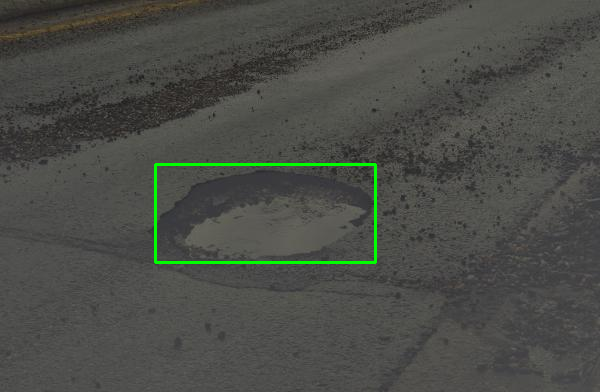

In [ ]:
res = res_test[0]
image = cv2.imread(img)
# len(res.boxes)
# box = res.boxes[0]

for box in res.boxes:
  conf = round(box.conf[0].item(), 2)

  if conf > 0.5:
    class_id = res.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]


    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

    start_point = (cords[0], cords[1])
    end_point = (cords[2], cords[3])
    img_res = cv2.rectangle(image, start_point, end_point, color=(0,255,0), thickness=2)
  else:
    break

cv2_imshow(img_res)

In [ ]:
metrics = model.val(data = "/content/data.yaml")

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/data/val/gen_imgs.cache... 214 images, 0 backgrounds, 0 corrupt: 100%|██████████| 214/214 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.65it/s]


                   all        214        343      0.636      0.583      0.572      0.344
Speed: 0.3ms preprocess, 20.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/yolov8n_custom32


In [ ]:
metrics.box.f1

array([    0.60819])

In [ ]:
metrics.box.p

array([    0.63554])

In [ ]:
metrics.box.r

array([    0.58309])